<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37636 entries, 0 to 37635
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Application number                            37636 non-null  object 
 1   Date submitted                                37634 non-null  object 
 2   Date closed                                   37634 non-null  object 
 3   Student                                       37636 non-null  object 
 4   Mode of study                                 37636 non-null  object 
 5   Level of study (I - Engineering, M - Master)  37636 non-null  object 
 6   Language                                      37636 non-null  object 
 7   Specialization                                37636 non-null  object 
 8   Application status                            37636 non-null  object 
 9   Type of application                           37636 non-null 

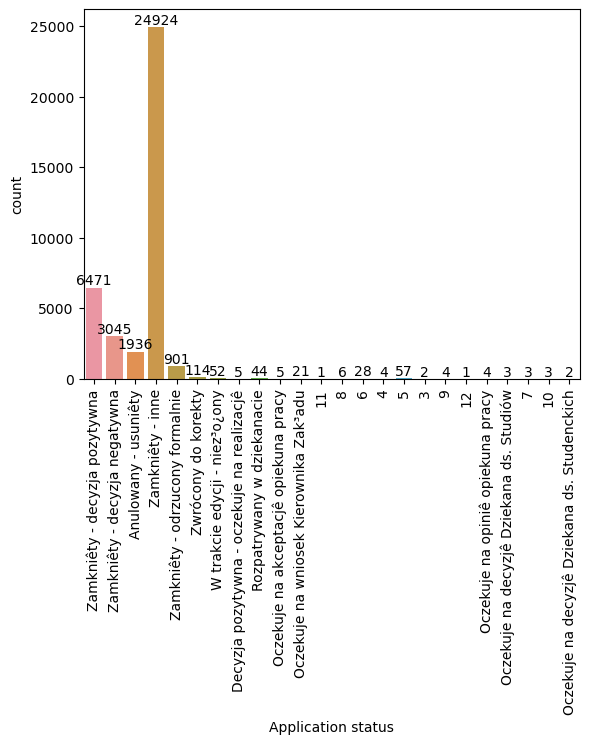

(37636, 43)
(35346, 43)


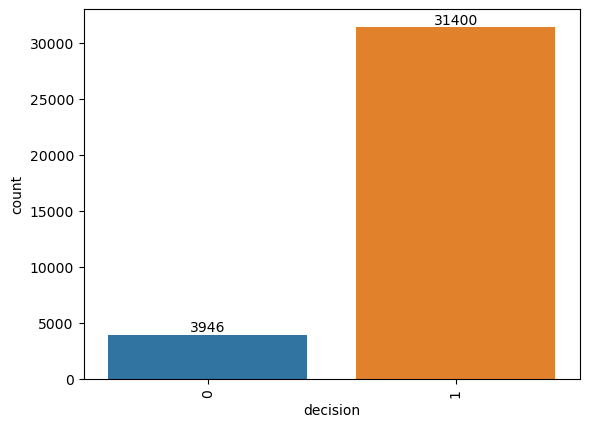

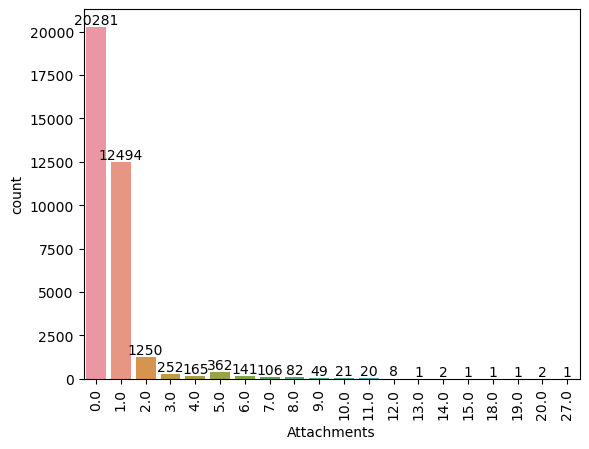

In [22]:
%run 03_filter_attachments.ipynb

In [41]:
negative_rows = sa[sa.decision == 0]
positive_rows = sa[sa.decision == 1]

print(negative_rows.shape)
print(positive_rows.shape)

(3902, 43)
(31338, 43)


In [42]:
limited_positive_rows = positive_rows.sample(n = len(negative_rows))

print(limited_positive_rows.shape)

(3902, 43)


In [53]:
selected_rows = pd.concat([negative_rows, limited_positive_rows])

print(selected_rows.shape)


(7804, 43)


[Text(0, 0, '3902'), Text(0, 0, '3902')]

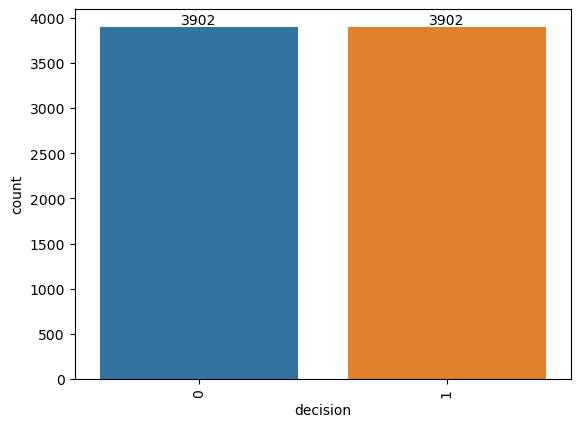

In [55]:
chart = sns.countplot(data=selected_rows, x='decision')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])

In [56]:
x_columns = ['Attachments', 'Missing ECTS', 'Total ECTS', 'Missing subjects from sem 1', 'Missing subjects from sem 3', 'Thesis count']

X = selected_rows.loc[:, x_columns]
y = np.ravel(selected_rows.loc[:, ['decision']])

print(X.shape)
print(y.shape)

(7804, 6)
(7804,)
